In [2]:
## RUN ME FIRST!
from image_audio import * 
import numpy as np
%matplotlib inline

# Fireworks


We missed Guy Fawkes day, but we can simulate fireworks using a simple **particle system**. We will use very (*very*) basic physics to simulate how particles (in this case, little bits of fireworks) move around. We will use numerical arrays (NumPy arrays) to compute the movement of a "whole" firework at once.

The output from your code for this part should look like this:
<img src="imgs/fireworks.png">

We'll simulate this using a very set of simple equations that apply to a whole set of particles at the same time (i.e. vectorized operations).

## Particle system

Assume we can model a single firework explosion at a given time as a set of N points in 2D, i.e. an array of N rows of 2 columns (x and y).  

    [[x, y]
     [x, y]
     [x, y]
     ...
     ]
    
To simulate a firework exploding, we need to simulate the motion of these points "bursting out" from a central position and falling down.

Assume we also have some information about the initial velocity  of each particle (i.e. which way it went at the moment of detonation). This is a vector, and has two components, "dx" and "dy", the rate of movement in each of those two directions.

We can write a 2D vector in space at time $t$ as $\textbf{x_t}=[x,y]$ and a 2D velocity vector as $\textbf{dx_t} = [dx, dy]$.

We can predict where the particle is at time $t$ from where it was in the last time step $t-1$ using the equations:
$$\textbf{x}_{t} = \textbf{x}_{t_1} + \textbf{dx}_{t_1}$$
$$\textbf{dx}_{t} = \textbf{dx}_{t-1} * d$$
$$\textbf{dx}_{t}.y = \textbf{dx}_{t-1}.y - g$$

$d$ is a damping factor (from air resistance). $g$ is the gravitational force.

Note that **x** and **dx** are 2D vectors (i.e. they have $x$ and $y$ components), not just plain numbers!

## Random  numbers
We can use random numbers to give initial values for the velocities (after all, the particles all spread out in random ways when a firework goes off). The function `np.random.normal(mean, std, shape)` generates *normally distributed* values, centered on `mean` with a "spread" given by `std`, in an array of the given `shape`.

In [3]:
# 4 element vector, centered on 0, spread of 0.1
print((np.random.normal(loc=0, scale=0.1, size=(4,))))

[-0.28365763 -0.01792112  0.0755372  -0.05409271]


In [4]:
# 8 element vector, centered on 0, spread of 10
print((np.random.normal(loc=0, scale=10, size=(8,))))

[ -6.20258135   1.79326277  -9.53513023 -13.79811322   6.38302002
  -5.58605419   4.07300814  -1.99685426]


In [5]:
# 6x6 matrix, centered on 0, spread of 2
print((np.random.normal(loc=0, scale=2, size=(6,6))))

[[ 1.60042062e+00  3.71309714e+00  9.59858722e-01  1.83206603e+00
  -2.79728539e+00  1.28758268e+00]
 [ 2.74159468e-01 -1.65126223e+00  1.20172190e+00  1.63263163e+00
  -2.25258556e+00  1.06650690e+00]
 [ 5.11170928e-01 -2.55685640e+00 -9.77729130e-01 -6.36597576e-01
  -2.31517015e+00 -2.45005770e+00]
 [ 1.82087047e+00 -2.53011643e-01 -1.58316975e+00  1.59543417e+00
  -1.94537808e+00 -2.05572589e+00]
 [ 2.12733442e+00  3.21423993e+00  3.15479892e+00  7.34831152e-01
   1.32991150e+00 -2.66192573e+00]
 [ 1.29143289e+00 -3.83409542e-01  2.57897153e+00 -3.74657834e-02
  -1.59310201e+00 -2.03320457e-03]]


In [6]:
a = np.array([[0,1], [2,1]])
# print(a)
print(np.tile(a, (2,2)))

[[0 1 0 1]
 [2 1 2 1]
 [0 1 0 1]
 [2 1 2 1]]


## A. 2 Tiling
`np.tile(a, shape)` will copy `a` multiple times in a grid shape. For example, `np.tile(a, (2,2))` will copy an array twice in columns and twice in rows, joining the result together:

In [7]:
a = np.array([[0,4,5],[3,2,1]])
print(a.shape)
np.tile(a, (50,1))

(2, 3)


array([[0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3, 2, 1],
       [0, 4, 5],
       [3,

Using `np.tile` create an array of the numbers `[1,2,3,4]` tiled into 4 columns and 4 rows, so that the resulting output is a 4x16 array of values, like this:

    [[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
     [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
     [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4],
     [1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]]

Show the result as an image using `show_image(x)`, but divide every element of `x` by 4 before showing it.

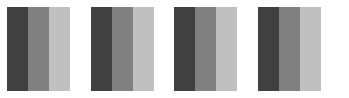

In [8]:
## Solution
x = np.tile([1,2,3,4], (4,4))
show_image(x/4)

## Task 1
Implement the equations of motion for a single firework.

* You should start with all points at the same *position* $\textbf{x}$$ (e.g. all at (0,0)), but with random velocities, using `np.random.normal()`, as above. 

* Start with 50 particles in the firework. Remember, the positions of every particle should be in *one single array*!

* To implement the gravity, remember you can modify a slice of an array (e.g. a column slice).

* Run the equations for 50 steps, updating the position and velocity. Each iteration should compute a new array.

* Use `plot_array(pts)` defined below to plot the positions *on each timestep*. Use the `s` optional parameter to set the size of the points to `50-i`, where i is the iteration number.

* To start, use `g=0.01`, `d=0.9`. Adjust these as you feel best.

* At the end, you should get a single, monochrome firework like this:

<img src="imgs/mono_firework.png">

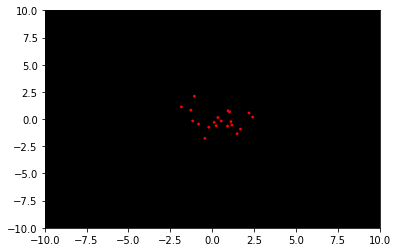

In [9]:
import numpy as np
from image_audio import *
def plot_array(pts, c=None, s=8):
    """Plot pts (must be a Nx2 array) as points. 
    If c is specified, it must be an Nx4 array of RGBA values, giving
    the colour for each point."""
    plt.gca().set_facecolor('black')
    if c is None:
        plt.scatter(pts[:,0], pts[:,1], c='r', edgecolor="none", s=s)
    else:
        plt.scatter(pts[:,0], pts[:,1], c=np.clip(c,0,1), edgecolor="none", s=s)
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.05)

# Example: plot 20 random 2D points
plot_array(np.random.normal(0,1,(20,2)))

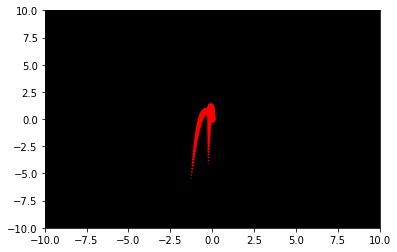

In [10]:
## Solution
x_t = np.zeros((2, 2))
dx_t = np.random.normal(0, 0.15, (2,2))
# print(x_t[1,:])
# x_t = x_t[0,1] + dx
for i in range(50):
    plot_array(x_t, s=50-i)
    x_t += dx_t
    dx_t *= 0.99
    # dx_t[:,1] * dx_t = dx_t * (dx_t[:,1] - 0.01)
    dx_t[:,1] = dx_t[:,1] - 0.01 

In [11]:
print(dx_t)
print(dx_t[:,1])

[[-0.00353176 -0.30154204]
 [-0.01936515 -0.3225524 ]]
[-0.30154204 -0.3225524 ]


### Task 2
* Plot several fireworks, each with a different random starting position.
* Start with 5 fireworks.
* plot_array() can take a second argument, `color`:
e.g. `plot_array(x, color)`
* The colours given to plot_array must be an Nx4 array (red, green, blue, alpha). The alpha column should initially be set to 1, so that the fireworks don't start out transparent. RGB should be values between 0 and 1.
* Choose a random colour for each firework. Note that you need to give a colour for each *particle* in the firework. (*hint*: how can `np.tile()` help you?)
* Make the colours fade as the simulation runs (i.e. they should get darker or more transparent in future time steps). Think about how the damping changed the velocity.

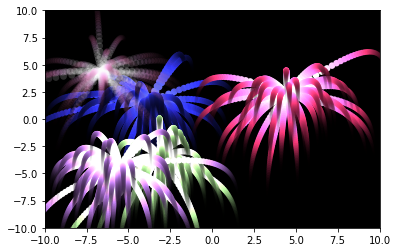

In [12]:
# color1 = [red, green, blue, 1]

for j in range(5):
    # red = np.random.uniform(0.5, 10)
    # green = np.random.uniform(0.5, 10)
    # blue = np.random.uniform(0.5, 10)
    # alpha = np.random.uniform(0.5, 10)
    x = np.random.normal(loc=0, scale=5, size=(2))
    fire = np.tile(x, (50,1))
    V = np.random.normal(loc=0, scale=0.2, size=(50,2))
    color = np.random.uniform(0, 10, (4))
    c = np.tile(color, (50,1))
    for i in range(50):
        c *= 0.9
        plot_array(fire, c=c, s=50-i)
        fire += V
        V *= 0.92
        V[:,1] = V[:,1] - 0.01
        
    

In [13]:
a = np.array([[0,1], [2,3]])
print(a)
print(a[:,0])

[[0 1]
 [2 3]]
[0 2]


In [14]:
x = np.random.normal(loc=0, scale=5, size=(2,2))
fire = np.tile(x, (10,))
print(x)
print(fire)

[[-1.81895366 -4.33377404]
 [ 5.46067654 -9.07831498]]
[[-1.81895366 -4.33377404 -1.81895366 -4.33377404 -1.81895366 -4.33377404
  -1.81895366 -4.33377404 -1.81895366 -4.33377404 -1.81895366 -4.33377404
  -1.81895366 -4.33377404 -1.81895366 -4.33377404 -1.81895366 -4.33377404
  -1.81895366 -4.33377404]
 [ 5.46067654 -9.07831498  5.46067654 -9.07831498  5.46067654 -9.07831498
   5.46067654 -9.07831498  5.46067654 -9.07831498  5.46067654 -9.07831498
   5.46067654 -9.07831498  5.46067654 -9.07831498  5.46067654 -9.07831498
   5.46067654 -9.07831498]]
